# Sarter Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Data

In [14]:
# read train data
df_orders = pd.read_csv("DATA/orders.csv", sep=";")
df_products = pd.read_csv("DATA/product_attributes.csv", sep=",")
df_dists = pd.read_csv("DATA/cities_data.csv", sep=";")

# read test data
df_test = pd.read_csv("DATA/test.csv", sep=";")

In [13]:
S1 = set(list(df_orders["product_id"]))
S2 = set(list(df_test["product_id"]))

S3 = set(list(df_products["product_id"]))

print(S1 - S3)
print(S2 - S3)

{-1}
{-1}


In [3]:
df_orders.info()
df_products.info()
df_dists.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114276 entries, 0 to 114275
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   order_id            114276 non-null  object
 1   origin_port         114276 non-null  object
 2   3pl                 114276 non-null  object
 3   customs_procedures  114276 non-null  object
 4   logistic_hub        113227 non-null  object
 5   customer            114276 non-null  object
 6   product_id          114276 non-null  int64 
 7   units               114276 non-null  int64 
 8   late_order          114276 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 7.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   product_id         772 non-null    int64
 1   weight             772 non-null    int64
 2  

## Dummy Model

In [4]:
from sklearn.dummy import DummyClassifier

X_train = df_orders.drop(['late_order'], axis=1)
y_train = df_orders['late_order']

X_test = df_test

dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X_train, y_train)

pred_proba = dummy_clf.predict_proba(X_test)

## Save Solution
> **Note:** Submited probabilities must be for the **True** cases.

In [4]:
#submission = pd.DataFrame({"order_id": X_test.order_id, "late_order": pred_proba[:,1]})
#submission.to_csv("submission_kaggle.csv", index=False)

# Data understanding

In [5]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114276 entries, 0 to 114275
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   order_id            114276 non-null  object
 1   origin_port         114276 non-null  object
 2   3pl                 114276 non-null  object
 3   customs_procedures  114276 non-null  object
 4   logistic_hub        113227 non-null  object
 5   customer            114276 non-null  object
 6   product_id          114276 non-null  int64 
 7   units               114276 non-null  int64 
 8   late_order          114276 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 7.1+ MB


In [6]:
train_cities = pd.concat([pd.concat([df_orders.origin_port, df_orders.logistic_hub]), df_orders.customer]).unique()
formal_cities = pd.concat([df_dists.city_from_name, df_dists.city_to_name]).unique()
dif_city_names = [city for city in train_cities if city not in formal_cities]

In [253]:
dif_city_names

['BCN', 'ATHENAS', nan]

In [252]:
conversion_dict = {'BCN': 'Barcelona', 'ATHENAS': 'Athens'}
def wrong_cities(row):
    if row['origin_port'] in conversion_dict.keys():
        row['origin_port'] = conversion_dict[row['origin_port']]
    if row['logistic_hub'] in conversion_dict.keys():
        row['logistic_hub'] = conversion_dict[row['logistic_hub']]
    if row['customer'] in conversion_dict.keys():
        row['customer'] = conversion_dict[row['customer']]
    return row
df_orders = df_orders.apply(lambda x: wrong_cities(x), axis = 1)

In [10]:
df_orders.head(5)

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,late_order
0,366c7a3d298f,Rotterdam,v_002,DTP,Venlo,Marseille,1692723,583,True
1,45f906331e10,Rotterdam,v_004,CRF,Rome,Marseille,1644308,459,False
2,ac84a6e4af0f,Athens,v_002,CRF,Venlo,Paris,1684170,464,True
3,f5e98cb29790,Rotterdam,v_004,CRF,Lille,Milan,1620510,678,False
4,a9e7c9bee35b,Barcelona,v_002,CRF,Venlo,Berlin,1699372,353,False


In [14]:
df_orders.customs_procedures.describe()

count     114276
unique         3
top          CRF
freq       51477
Name: customs_procedures, dtype: object

In [11]:
delayed_delivery = df_orders[df_orders.late_order==True]
correct_delivery = df_orders[df_orders.late_order==False]

## customs_procedures

In [13]:
desc = pd.DataFrame({'values':[], 'frequency':[]})
occurrrences = df_orders['customs_procedures'].value_counts(ascending=False)
desc['values'] = list(occurrrences.keys())
desc['frequency'] = list(occurrrences)
percentages = [occurrrences[method]/sum(list(occurrrences)) for method in occurrrences.keys()]
desc['percentage'] = percentages
display(desc)

,values,frequency,percentage
0,CRF,51477,0.450462
1,DTD,43484,0.380517
2,DTP,19315,0.169021


In [19]:
desc = pd.DataFrame({'values':[], 'frequency':[]})
occurrrences = delayed_delivery['customs_procedures'].value_counts(ascending=False)
desc['values'] = list(occurrrences.keys())
desc['frequency'] = list(occurrrences)
percentages = [occurrrences[method]/sum(list(occurrrences)) for method in occurrrences.keys()]
desc['percentage'] = percentages
display(desc)

,values,frequency,percentage
0,DTD,10936,0.402710
1,CRF,10203,0.375718
2,DTP,6017,0.221572


In [20]:
desc = pd.DataFrame({'values':[], 'frequency':[]})
occurrrences = correct_delivery['customs_procedures'].value_counts(ascending=False)
desc['values'] = list(occurrrences.keys())
desc['frequency'] = list(occurrrences)
percentages = [occurrrences[method]/sum(list(occurrrences)) for method in occurrrences.keys()]
desc['percentage'] = percentages
display(desc)

,values,frequency,percentage
0,CRF,41274,0.47376
1,DTD,32548,0.37360
2,DTP,13298,0.15264


## 3pl

In [16]:
desc = pd.DataFrame({'values':[], 'frequency':[]})
occurrrences = df_orders['3pl'].value_counts(ascending=False)
desc['values'] = list(occurrrences.keys())
desc['frequency'] = list(occurrrences)
percentages = [occurrrences[method]/sum(list(occurrrences)) for method in occurrrences.keys()]
desc['percentage'] = percentages
display(desc)

,values,frequency,percentage
0,v_002,54937,0.480740
1,v_004,44429,0.388787
2,v_001,7977,0.069805
3,v_003,6933,0.060669


In [17]:
desc = pd.DataFrame({'values':[], 'frequency':[]})
occurrrences = delayed_delivery['3pl'].value_counts(ascending=False)
desc['values'] = list(occurrrences.keys())
desc['frequency'] = list(occurrrences)
percentages = [occurrrences[method]/sum(list(occurrrences)) for method in occurrrences.keys()]
desc['percentage'] = percentages
display(desc)

,values,frequency,percentage
0,v_004,11416,0.420386
1,v_002,10957,0.403484
2,v_001,3048,0.112240
3,v_003,1735,0.063890


In [18]:
desc = pd.DataFrame({'values':[], 'frequency':[]})
occurrrences = correct_delivery['3pl'].value_counts(ascending=False)
desc['values'] = list(occurrrences.keys())
desc['frequency'] = list(occurrrences)
percentages = [occurrrences[method]/sum(list(occurrrences)) for method in occurrrences.keys()]
desc['percentage'] = percentages
display(desc)

,values,frequency,percentage
0,v_002,43980,0.504821
1,v_004,33013,0.378937
2,v_003,5198,0.059665
3,v_001,4929,0.056577


In [66]:
desc = pd.DataFrame({'values':[], 'frequency':[]})
occurrrences = df_orders['logistic_hub'].value_counts(ascending=False)
desc['values'] = list(occurrrences.keys())
desc['frequency'] = list(occurrrences)
percentages = [occurrrences[method]/sum(list(occurrrences)) for method in occurrrences.keys()]
desc['percentage'] = percentages
display(desc)

,values,frequency,percentage
0,Venlo,23700,0.209314
1,Hamburg,21480,0.189707
2,Warsaw,15803,0.139569
3,Dusseldorf,12518,0.110557
4,Rome,12460,0.110044
5,Lille,10248,0.090508
6,Zaragoza,7886,0.069648
7,Liege,4641,0.040988
8,Bratislava,4491,0.039664


In [104]:
df_orders.units.describe()

count    114276.000000
mean        484.915310
std          68.387351
min           1.000000
25%         447.000000
50%         486.000000
75%         522.000000
max         951.000000
Name: units, dtype: float64

In [69]:
positives.units.describe()

count    87120.000000
mean       478.505188
std         64.170661
min         45.000000
25%        443.000000
50%        482.000000
75%        517.000000
max        876.000000
Name: units, dtype: float64

In [138]:
negatives.units.describe()

count    27156.000000
mean       505.479820
std         76.912357
min          1.000000
25%        462.000000
50%        496.000000
75%        545.000000
max        951.000000
Name: units, dtype: float64

In [117]:
951 // interval_length

50

In [139]:
num_bins = 20
interval_length  = int((df_orders.units.max() - df_orders.units.min()) / num_bins)
discretized_units_pos = [0]*(num_bins+1)
discretized_units_neg = [0]*(num_bins+1)

for unit in positives.units:
    discretized_units_pos[unit // interval_length] += 1
    
for unit in negatives.units:
    discretized_units_neg[unit // interval_length] += 1 

In [148]:
indexes = [i for i in range(21)]

C:\Users\erodriguez\AppData\Local\Temp\ipykernel_9816\2706373262.py:1: RuntimeWarning: invalid value encountered in true_divide
  proportion = np.array(discretized_units_pos) / np.array(discretized_units_neg)


array([1.        , 0.        , 3.5       , 5.5       , 5.78947368,
       5.88235294, 5.51196172, 5.51643192, 4.87042842, 4.13191153,
       3.17103849, 3.30225011, 1.96149574, 0.87707641, 0.31476323,
       0.09022556, 0.04597701, 0.08333333, 0.2       ,        nan,
       0.        ])

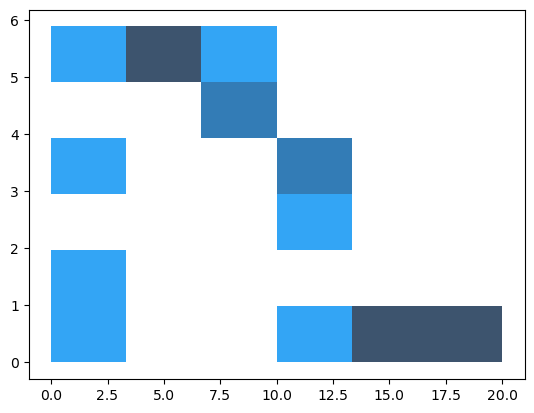

In [149]:
proportion = np.array(discretized_units_pos) / np.array(discretized_units_neg)
sns.histplot(x = indexes, y = proportion)
proportion

<AxesSubplot:xlabel='units', ylabel='Count'>

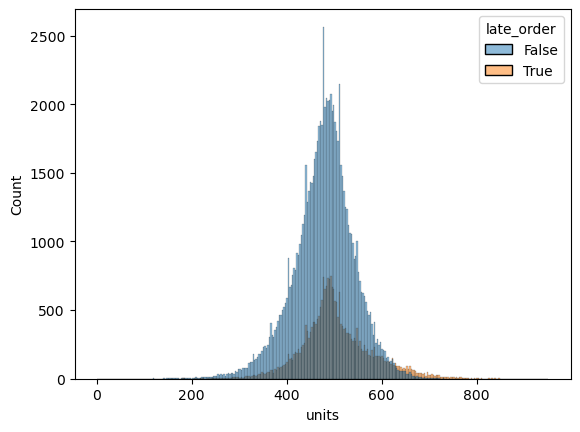

In [71]:
sns.histplot(data=df_orders, x="units", hue="late_order")

<AxesSubplot:xlabel='units', ylabel='Count'>

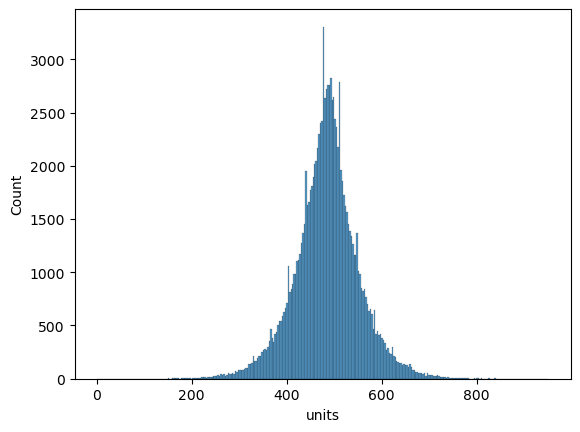

In [56]:
sns.histplot(df_orders.units)

In [45]:
perc_pos = len(positives[positives.units] >)

,values,frequency,percentage
0,493,1002,0.008768
1,488,947,0.008287
2,485,947,0.008287
3,490,942,0.008243
4,494,940,0.008226
...,...,...,...
660,164,1,0.000009
661,155,1,0.000009
662,45,1,0.000009
663,180,1,0.000009


## Custom Precedures

In [10]:
df_dists.head(50)

,city_from_name,city_to_name,city_from_coord,city_to_coord,distance
0,Dusseldorf,Zaragoza,"(51.2254018, 6.7763137)","(41.6521342, -0.8809428)",1214.4772
1,Dusseldorf,Venlo,"(51.2254018, 6.7763137)","(51.39244885, 6.1511724144122955)",47.3876
2,Dusseldorf,Bratislava,"(51.2254018, 6.7763137)","(48.1516988, 17.1093063)",819.2894
3,Dusseldorf,Hamburg,"(51.2254018, 6.7763137)","(53.550341, 10.000654)",339.2215
4,Dusseldorf,Rome,"(51.2254018, 6.7763137)","(41.8933203, 12.4829321)",1125.0290
5,Dusseldorf,Lille,"(51.2254018, 6.7763137)","(50.6365654, 3.0635282)",269.0769
6,Dusseldorf,Liege,"(51.2254018, 6.7763137)","(50.6450944, 5.5736112)",106.3716
7,Dusseldorf,Warsaw,"(51.2254018, 6.7763137)","(52.2337172, 21.071432235636493)",992.3709
8,Dusseldorf,Paris,"(51.2254018, 6.7763137)","(48.8588897, 2.3200410217200766)",413.6191
9,Dusseldorf,Lyon,"(51.2254018, 6.7763137)","(45.7578137, 4.8320114)",624.6864


## encode

In [44]:
def simple_encode(value):
    global encoding_dict
    if value not in list(encoding_dict.keys()):
        try:
            prev_val = encoding_dict[list(encoding_dict.keys())[-1]]
        except IndexError:
            prev_val = 0
        encoding_dict[value] = prev_val + 1
    return encoding_dict[value]

In [54]:
encoding_dict = {}
company = correct_delivery['3pl'].apply(lambda x: simple_encode(x))
encoding_dict = {}
procedures = correct_delivery['customs_procedures'].apply(lambda x: simple_encode(x))

In [ ]:
desc = pd.DataFrame({'values':[], 'frequency':[]})
occurrrences = df_orders['customs_procedure'].value_counts(ascending=False)
desc['values'] = list(occurrrences.keys())
desc['frequency'] = list(occurrrences)
display(desc)

In [61]:
mat

,company,procedures
company,1.000000,-0.000139
procedures,-0.000139,1.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 87120 entries, 1 to 114275
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   company     87120 non-null  int64
 1   procedures  87120 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


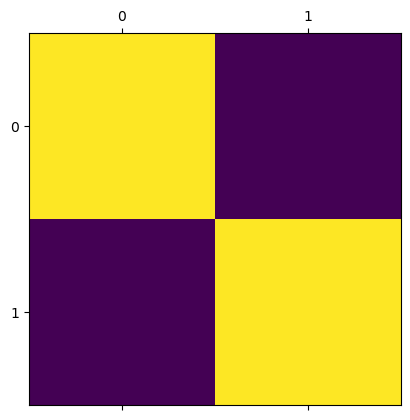

In [60]:
temp = pd.DataFrame()
temp['company'] = company
temp['procedures'] = procedures
temp.info()
mat = temp.corr()
plt.matshow(mat)
plt.show()

# Train Model

In [96]:
from scipy.stats import iqr
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_curve, classification_report, confusion_matrix, precision_score, recall_score, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [254]:
cities = np.append(pd.concat([df_dists.city_from_name, df_dists.city_to_name]).unique(), 'no hub')
city_encoder = LabelEncoder()
city_encoder.fit(cities)
encoder_3pl = LabelEncoder()
encoder_3pl.fit(df_orders['3pl'])
encoder_CP = LabelEncoder()
encoder_CP.fit(df_orders['customs_procedures'])

LabelEncoder()

In [186]:
final_df = pd.merge(df_orders, df_products, how='inner', on="product_id")
final_df['units_weights'] = final_df.weight * final_df.units
final_df['origin_port'] = df_orders['origin_port'].apply(lambda x: city_encoder.transform([x])[0])
final_df["logistic_hub"].fillna("no hub", inplace = True)
final_df['logistic_hub'] = final_df['logistic_hub'].apply(lambda x: city_encoder.transform([x])[0])
final_df['customer'] = df_orders['customer'].apply(lambda x: city_encoder.transform([x])[0])
final_df['3pl'] = df_orders['3pl'].apply(lambda x: encoder_3pl.transform([x])[0])
final_df['customs_procedures'] = df_orders['customs_procedures'].apply(lambda x: encoder_CP.transform([x])[0])
final_df = final_df[['origin_port', '3pl', 'customs_procedures', 'logistic_hub', 
                     'customer', 'material_handling', 'units_weights', 'late_order']]
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114158 entries, 0 to 114157
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   origin_port         114158 non-null  int32
 1   3pl                 114158 non-null  int32
 2   customs_procedures  114158 non-null  int32
 3   logistic_hub        114158 non-null  int32
 4   customer            114158 non-null  int32
 5   material_handling   114158 non-null  int64
 6   units_weights       114158 non-null  int64
 7   late_order          114158 non-null  bool 
dtypes: bool(1), int32(5), int64(2)
memory usage: 4.9 MB


In [195]:
X_train, X_test, y_train, y_test= train_test_split(final_df.iloc[:,:-1], final_df.iloc[:,-1], test_size=0.20, random_state=0) #test_size=0.33 camb

In [196]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91326 entries, 87661 to 68268
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   origin_port         91326 non-null  int32
 1   3pl                 91326 non-null  int32
 2   customs_procedures  91326 non-null  int32
 3   logistic_hub        91326 non-null  int32
 4   customer            91326 non-null  int32
 5   material_handling   91326 non-null  int64
 6   units_weights       91326 non-null  int64
dtypes: int32(5), int64(2)
memory usage: 3.8 MB


In [197]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [204]:
pred_proba = clf.predict_proba(X_test)[:,1]

In [211]:
pred_y = [1  if pred_proba[i] >= 0.5 else 0 for i in range(len(pred_proba))]

In [219]:
accuracy = 0
for i in range(len(pred_proba)):
    if pred_y[i] == list(y_test)[i]:
        accuracy+=1
print(accuracy/len(pred_proba))

0.7725998598458305


In [220]:
np.sum(pred_y)

3166

In [222]:
df_test

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units
0,0e364fa5c795,Rotterdam,v_002,CRF,Warsaw,Munich,1687644,477
1,3ef49bd5a55b,Barcelona,v_002,CRF,Venlo,Berlin,1699689,240
2,9ab5b9685bd5,Rotterdam,v_004,DTD,Bratislava,Paris,1652615,506
3,bfce5b4fc4fa,Rotterdam,v_002,DTD,Rome,Hanover,1669740,553
4,d94453ec8ec5,Barcelona,v_001,CRF,Bratislava,Copenhagen,1695138,482
...,...,...,...,...,...,...,...,...
28558,d268acf6459e,Athens,v_004,CRF,Dusseldorf,Naples,1657474,496
28559,1aefc30b0eb3,Rotterdam,v_004,DTD,Hamburg,Bordeaux,1657437,577
28560,646a2e50e170,Rotterdam,v_001,CRF,Venlo,Milan,1689781,483
28561,bf5177549be9,ATHENAS,v_001,CRF,Lille,Milan,1672088,564


## Test

In [255]:
df_test = df_test.apply(lambda x: wrong_cities(x), axis = 1)

In [256]:
len(df_test.product_id.unique())

763

In [267]:
prods_test = list(df_test.product_id.unique())
prods = list(df_products.product_id.unique())
for 

In [266]:
final_df = pd.merge(df_test, df_products, how='inner', on="product_id")
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28518 entries, 0 to 28517
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            28518 non-null  object
 1   origin_port         28518 non-null  object
 2   3pl                 28518 non-null  object
 3   customs_procedures  28518 non-null  object
 4   logistic_hub        28253 non-null  object
 5   customer            28518 non-null  object
 6   product_id          28518 non-null  int64 
 7   units               28518 non-null  int64 
 8   weight              28518 non-null  int64 
 9   material_handling   28518 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 2.4+ MB


In [257]:
final_df = pd.merge(df_test, df_products, how='left', on="product_id")
final_df['units_weights'] = final_df.weight * final_df.units
final_df['origin_port'] = df_orders['origin_port'].apply(lambda x: city_encoder.transform([x])[0])
final_df["logistic_hub"].fillna("no hub", inplace = True)
final_df['logistic_hub'] = final_df['logistic_hub'].apply(lambda x: city_encoder.transform([x])[0])
final_df['customer'] = df_orders['customer'].apply(lambda x: city_encoder.transform([x])[0])
final_df['3pl'] = df_orders['3pl'].apply(lambda x: encoder_3pl.transform([x])[0])
final_df['customs_procedures'] = df_orders['customs_procedures'].apply(lambda x: encoder_CP.transform([x])[0])
final_df = final_df[['origin_port', '3pl', 'customs_procedures', 'logistic_hub', 
                     'customer', 'material_handling', 'units_weights']]
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28563 entries, 0 to 28562
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   origin_port         28563 non-null  int32  
 1   3pl                 28563 non-null  int32  
 2   customs_procedures  28563 non-null  int32  
 3   logistic_hub        28563 non-null  int32  
 4   customer            28563 non-null  int32  
 5   material_handling   28518 non-null  float64
 6   units_weights       28518 non-null  float64
dtypes: float64(2), int32(5)
memory usage: 1.2 MB


In [245]:
predictions = clf.predict_proba(final_df)[:,1]
submission = pd.DataFrame({"order_id": df_test.order_id, "late_order": predictions})
submission.to_csv("submission_kaggle.csv", index=False)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [235]:
len(predictions)

28518

In [236]:
len(df_test)

28563